In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%matplotlib inline

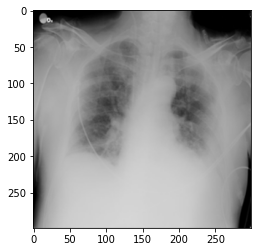

In [3]:
img = image.load_img("basedata/train/COVID/COVID-1.png")
plt.imshow(img)

In [4]:
cv2.imread("basedata/train/COVID/COVID-1.png").shape

(299, 299, 3)

In [ ]:
# calling the image

#img = image.load_img("..//xyz.png")
#plt.imshow(img)
#
#cv2.imread("").shape

#As it is the RGB image (ranges from 0 to 255) 
#and image required for the processing is within 0 to 1, so
#divide the pixel value by 255

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset = train.flow_from_directory('basedata/train/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
#checkout for the class_mode

Found 5760 images belonging to 2 classes.
Found 1440 images belonging to 2 classes.


In [10]:
train_dataset.class_indices 
#to get the various classes with the allocated values
#train_dataset.classes

{'COVID': 0, 'Normal': 1}

In [11]:
# creating the model from start
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',
                           input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512,activation= 'relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid') #softmax intested sigmoid
])

In [12]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),#adam can be used
             metrics = ['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 15,
                     validation_data = validation_dataset)
#use callback function for the required accuracy

Epoch 1/15
5/5 [==============================] - 91s 18s/step - loss: 0.7508 - accuracy: 0.5333 - val_loss: 0.7612 - val_accuracy: 0.5042
Epoch 2/15
5/5 [==============================] - 82s 16s/step - loss: 0.7497 - accuracy: 0.5333 - val_loss: 0.7047 - val_accuracy: 0.4986
Epoch 3/15
5/5 [==============================] - 77s 15s/step - loss: 0.5232 - accuracy: 0.7333 - val_loss: 0.7758 - val_accuracy: 0.4965
Epoch 4/15
5/5 [==============================] - 81s 16s/step - loss: 0.7039 - accuracy: 0.4667 - val_loss: 0.7380 - val_accuracy: 0.4896
Epoch 5/15
5/5 [==============================] - 85s 17s/step - loss: 0.7092 - accuracy: 0.4667 - val_loss: 0.7287 - val_accuracy: 0.4826
Epoch 6/15
5/5 [==============================] - 92s 18s/step - loss: 0.5179 - accuracy: 0.8000 - val_loss: 0.7913 - val_accuracy: 0.5028
Epoch 7/15
5/5 [==============================] - 80s 16s/step - loss: 0.3392 - accuracy: 0.8000 - val_loss: 1.0818 - val_accuracy: 0.4979
Epoch 8/15
5/5 [===========

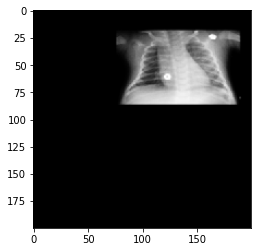

not_covid 


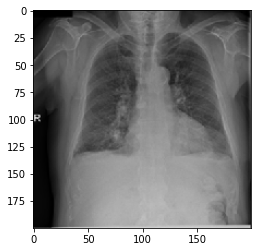

not_covid 


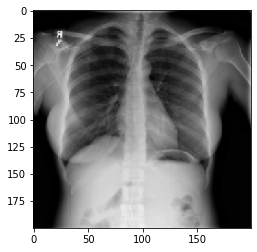

not_covid 


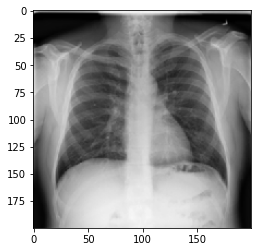

not_covid 


In [17]:
dir_path = 'basedata/test'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x= image.img_to_array(img)
    x= np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val= model.predict(images)
    if val==0:
        print("covid")
    else:
        print("not_covid ")
